In [110]:
#IMPORT ALL THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [111]:
#IMPORT ALL OF THE FILES

train = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\store sales time series\train.csv')
test = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\store sales time series\test.csv')
holiday = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\store sales time series\holidays_events.csv')
oil = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\store sales time series\oil.csv')
stores = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\store sales time series\stores.csv')
trans = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\store sales time series\transactions.csv')

In [112]:
#OIL FILE HAS SOME MISSING VALUES

oil = oil.fillna(method='backfill')
oil.set_index('date',inplace=True)

In [113]:
#MERGING ALL OF THE FILES TOGETHER

train_df = pd.merge(train,oil,on='date',how='left')
test_df = pd.merge(test,oil,on='date',how = 'left')

In [114]:
train_df = pd.merge(train_df,holiday,on='date',how='left')
test_df = pd.merge(test_df,holiday,on='date',how='left')

In [115]:
train_df = pd.merge(train_df,stores,on='store_nbr',how='left')
test_df = pd.merge(test_df,stores,on='store_nbr',how='left')

In [116]:
train_df = pd.merge(train_df,trans,on=['date','store_nbr'],how='left')
test_df = pd.merge(test_df,trans,on=['date','store_nbr'],how='left')

In [117]:
train_df.transactions = train_df.transactions.fillna(0)
test_df.transactions = test_df.transactions.fillna(0)

In [118]:
#SPLIT DAY, MONTH, YEAR, WEEKDAY, WEEKEND

train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [119]:
train_df['Day'] = train_df.date.dt.day
train_df['Month'] = train_df.date.dt.month
train_df['Year'] = train_df.date.dt.year

test_df['Day'] = test_df.date.dt.day
test_df['Month'] = test_df.date.dt.month
test_df['Year'] = test_df.date.dt.year


In [120]:
#ADD WEEKENDS AND WEEKDAYS
def weekend(date):
  import datetime
  weekend = []
  a = date
  for i in range(len(a)):
    if a.iloc[i].weekday() >= 5 :
      weekend.append(1)
    else:
      weekend.append(0)
  return weekend
def weekday(date):
    import datetime
    weekday = []
    a = date
    for i in range(len(a)):
        weekday.append(a.iloc[i].weekday())
    return weekday

In [121]:
train_df['Weekday'] = weekday(train_df['date'])
train_df['Weekend'] = weekend(train_df['date'])

test_df['Weekday'] = weekday(test_df['date'])
test_df['Weekend'] = weekend(test_df['date'])

In [122]:
#DATA EXPLORATION

In [123]:
train_df.rename(columns={'type_x':'holiday_type','type_y':'shop_type'},inplace=True)
test_df.rename(columns={'type_x':'holiday_type','type_y':'shop_type'},inplace=True)

In [124]:
sales_nbr_mean = train_df.groupby('store_nbr').agg({'sales':'mean'})

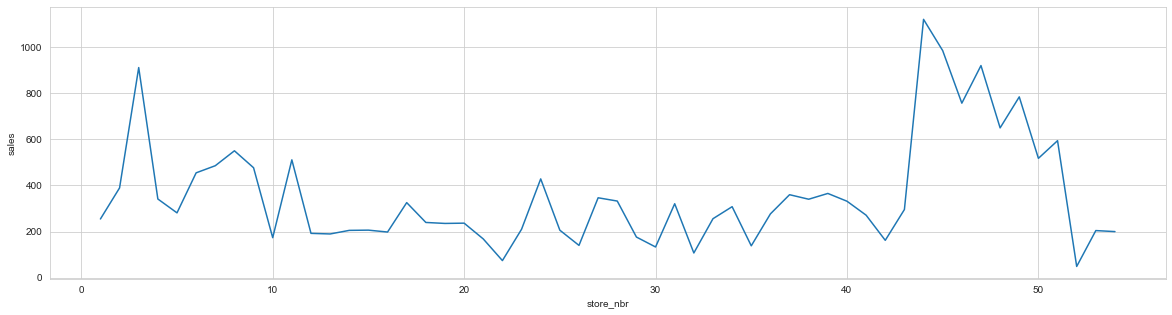

In [125]:
#SALES AVERAGE BY STORE NUMBER

plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
sns.lineplot(data=sales_nbr_mean,x='store_nbr',y='sales')
plt.show()

In [126]:
sales_monthly_avg = train_df.groupby('Month').agg({'sales':'mean'})

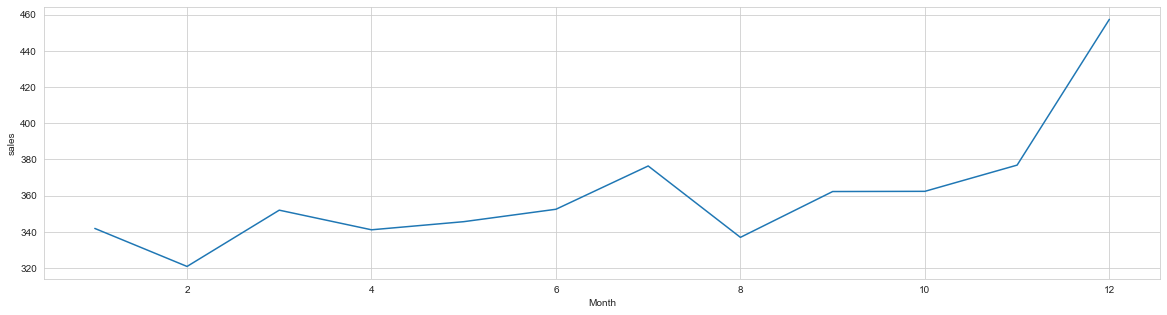

In [127]:
#SALES AVERAGE BY MONTH

plt.figure(figsize=(20,5))
sns.lineplot(data=sales_monthly_avg,x='Month',y='sales')
plt.show()

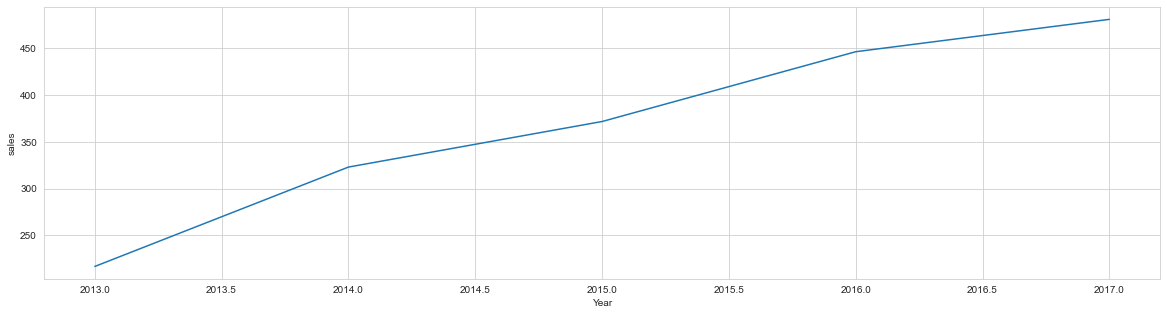

In [128]:
#SALES AVERAGE BY YEAR

sales_yearly_avg = train_df.groupby('Year').agg({'sales':'mean'})
plt.figure(figsize=(20,5))
sns.lineplot(data=sales_yearly_avg,x='Year',y='sales')
plt.show()

In [129]:
sales_weekend = train_df.groupby('Weekend').agg({'sales':'mean'}).reset_index()
#sales_weekend

In [130]:
#sw = sales_weekend.reset_index()

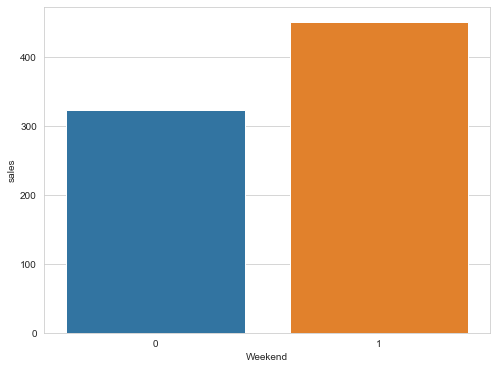

In [131]:
#SALES AVERAGE COMPARING WEEKDAYS AND WEEKENDS

plt.figure(figsize=(8,6))
sns.barplot(sales_weekend['Weekend'],sales_weekend['sales'])
plt.show()

In [132]:
family_sales_mean = train_df.groupby('family').agg({'sales':'mean'}).reset_index().sort_values(by='sales',ascending=False)[:20]
#family_sales_mean

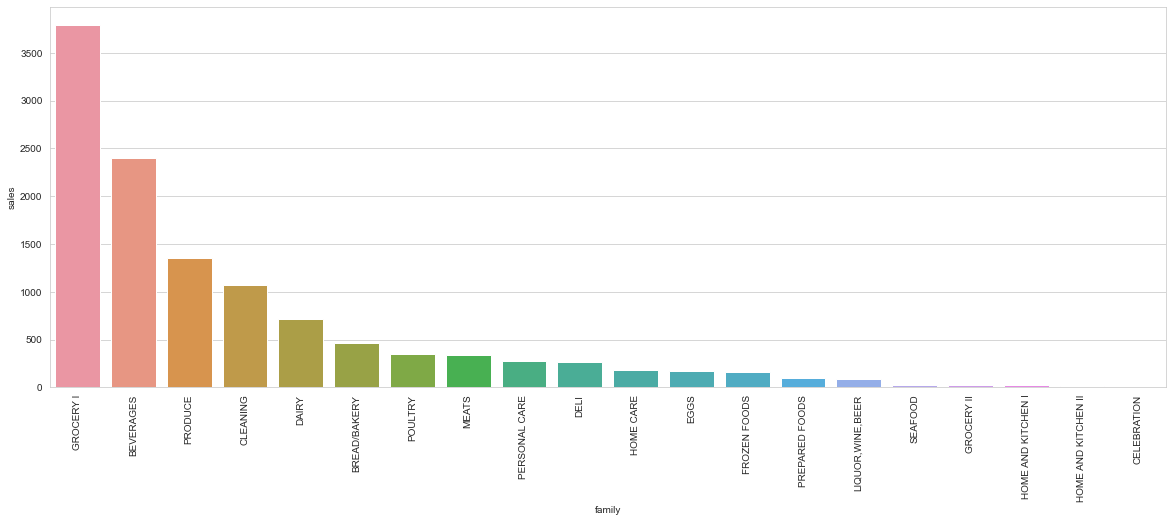

In [133]:
#SALES AVERAGE BY STORE FAMILY

plt.figure(figsize=(20,7))
sns.barplot(data=family_sales_mean,x='family',y='sales')
plt.xticks(rotation=90)
plt.show()

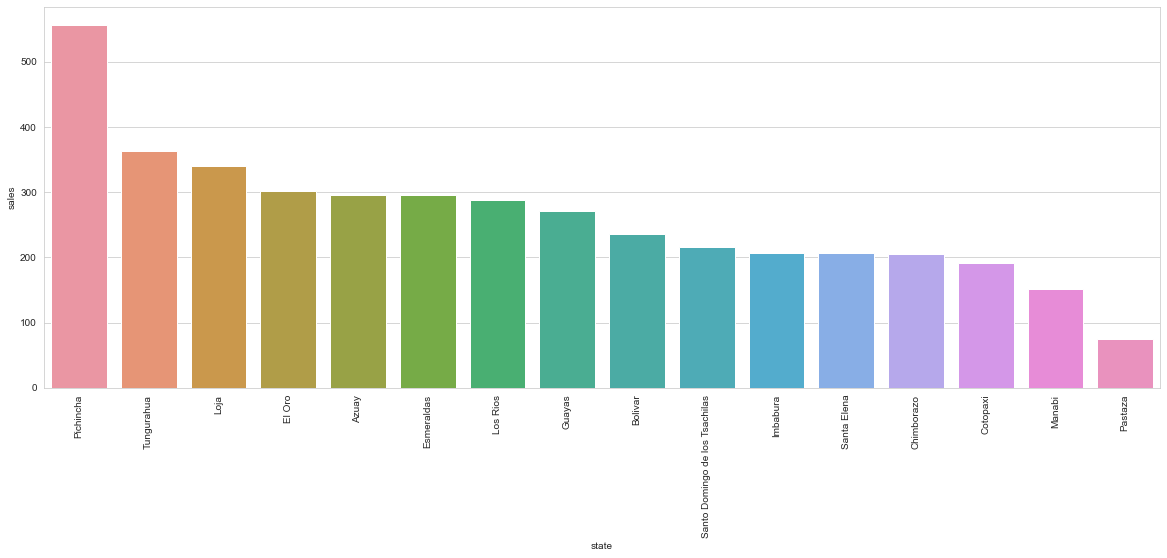

In [134]:
#SALES AVERAGE BY STATE

state_sales_mean = train_df.groupby('state').agg({'sales':'mean'}).reset_index().sort_values(by='sales',ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(data=state_sales_mean,x='state',y='sales')
plt.xticks(rotation=90)
plt.show()

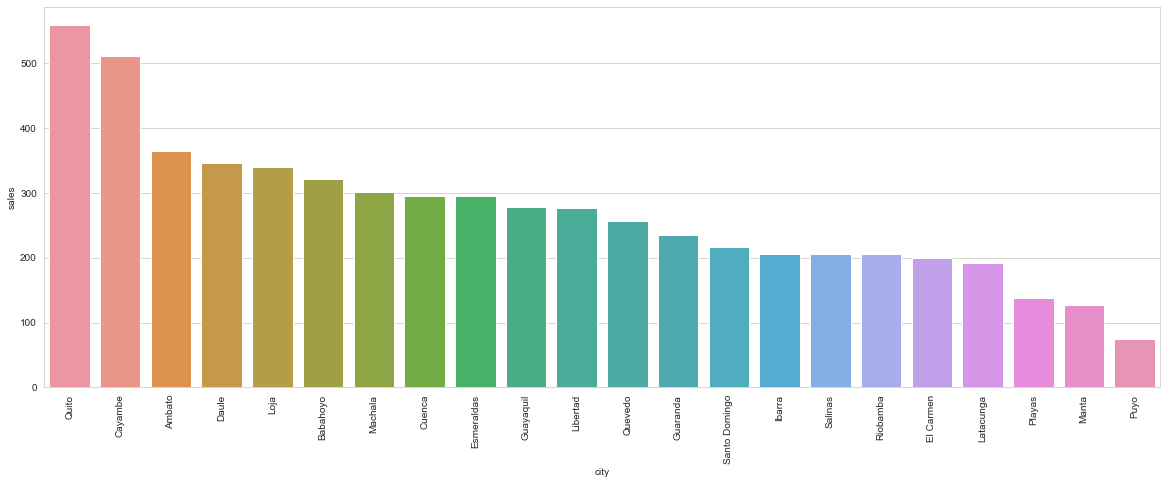

In [135]:
#SALES AVERAGE BY CITY

city_sales_mean = train_df.groupby('city').agg({'sales':'mean'}).reset_index().sort_values(by='sales',ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(data=city_sales_mean,x='city',y='sales')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

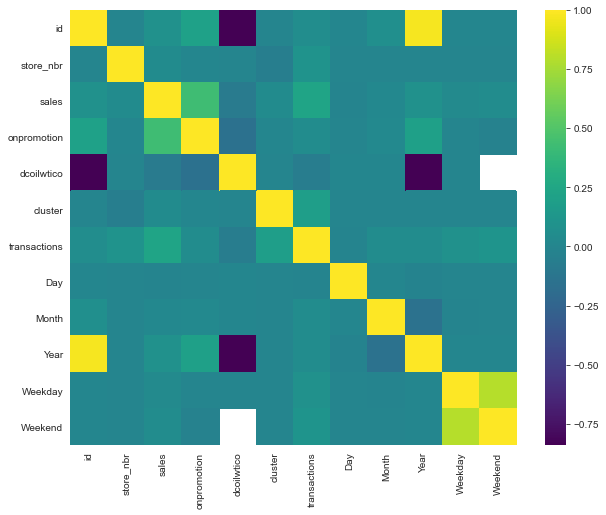

In [136]:
#CORRELATION MATRIX

plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(),cmap='viridis')

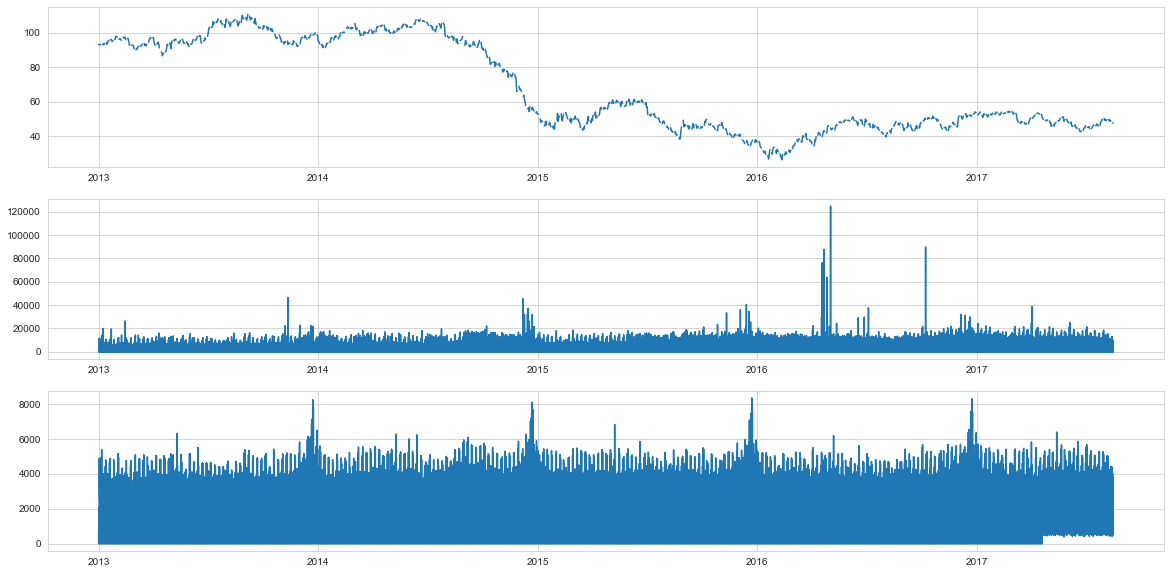

In [137]:
#TIME SERIES OF OIL PRICES, SALES AND NUMBER OF TRANSACTIONS

fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(20,10))
ax1.plot(train_df['date'],train_df['dcoilwtico'])
ax2.plot(train_df['date'],train_df['sales'])
ax3.plot(train_df['date'],train_df['transactions'])


<AxesSubplot:xlabel='sales'>

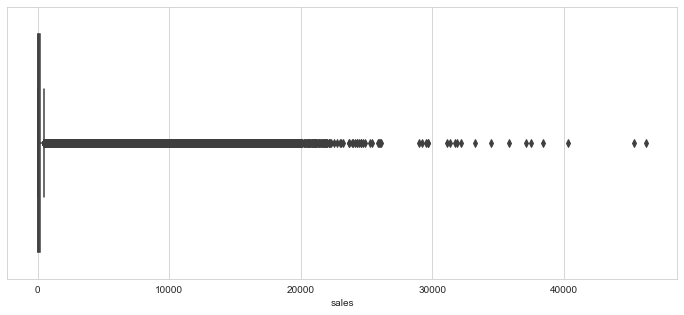

In [166]:
#LOOKING FOR OUTLIERS WITH BOXPLOT

plt.figure(figsize=(12,5))
sns.boxplot(train_df['sales'])

In [139]:
#CLEANING OUTLIERS

train_df.drop(train_df[train_df['sales']>50000].index,inplace=True)

In [140]:
train_df.drop('description',axis=1,inplace=True)

In [141]:
train_df.drop('id',axis=1,inplace=True)

In [142]:
train_df.drop(columns = ['date','transferred','Day','Weekday'],axis=1,inplace=True)
test_df.drop(columns = ['id','date','transferred','Day','Weekday','description'],axis=1,inplace=True)

In [143]:
#LABEL ENCODER

In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054340 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_nbr     int64  
 1   family        object 
 2   sales         float64
 3   onpromotion   int64  
 4   dcoilwtico    float64
 5   holiday_type  object 
 6   locale        object 
 7   locale_name   object 
 8   city          object 
 9   state         object 
 10  shop_type     object 
 11  cluster       int64  
 12  transactions  float64
 13  Month         int64  
 14  Year          int64  
 15  Weekend       int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 396.1+ MB


In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
encoder_family = LabelEncoder()
train_df['family'] = encoder_family.fit_transform(train_df['family'])
test_df['family'] = encoder_family.fit_transform(test_df['family'])

In [147]:
encoder_holiday_type = LabelEncoder()
train_df['holiday_type'] = encoder_holiday_type.fit_transform(train_df['holiday_type'])
test_df['holiday_type'] = encoder_holiday_type.fit_transform(test_df['holiday_type'])

In [148]:
encoder_locale = LabelEncoder()
train_df['locale'] = encoder_locale.fit_transform(train_df['locale'])
test_df['locale'] = encoder_locale.fit_transform(test_df['locale'])

In [149]:
encoder_locale_name = LabelEncoder()
train_df['locale_name'] = encoder_locale_name.fit_transform(train_df['locale_name'])
test_df['locale_name'] = encoder_locale_name.fit_transform(test_df['locale_name'])

In [150]:
encoder_city = LabelEncoder()
train_df['city'] = encoder_city.fit_transform(train_df['city'])
test_df['city'] = encoder_city.fit_transform(test_df['city'])

In [151]:
encoder_state = LabelEncoder()
train_df['state'] = encoder_state.fit_transform(train_df['state'])
test_df['state'] = encoder_state.fit_transform(test_df['state'])

In [152]:
encoder_shop_type = LabelEncoder()
train_df['shop_type'] = encoder_shop_type.fit_transform(train_df['shop_type'])
test_df['shop_type'] = encoder_shop_type.fit_transform(test_df['shop_type'])

In [153]:
#TRAIN TEST SPLIT

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X = train_df.drop('sales',axis=1)
y = train_df['sales']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [157]:
#XGB REGRESSOR

In [158]:
import xgboost as xgb

In [159]:
XGB = xgb.XGBRegressor(booster='gbtree')

In [160]:
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [161]:
pred = XGB.predict(X_test)

In [162]:
print(XGB.score(X_test,y_test))

0.9364240587038438


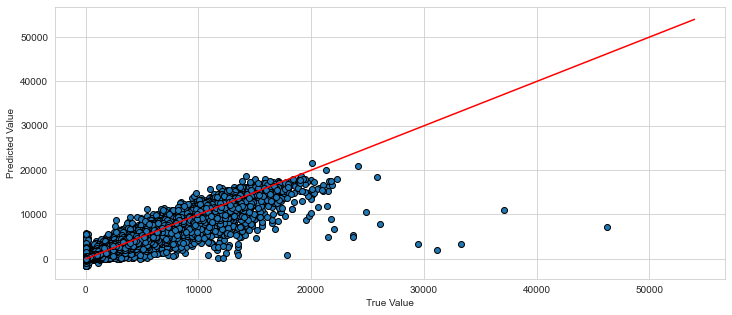

In [163]:
plt.figure(figsize=(12,5))
plt.scatter(y_test,pred,edgecolors='black')
plt.plot([6000*x for x in range(10)], [6000*x for x in range(10)], color = 'r')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()


In [164]:
from sklearn import metrics

In [165]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 95.17030010425887
MSE: 76950.78888323846
RMSE: 277.4000520606268


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

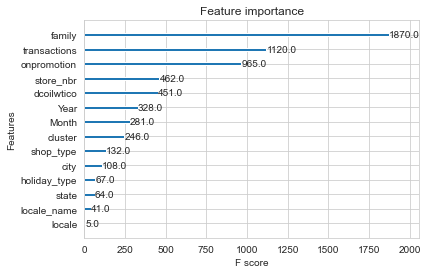

In [175]:
#IMPORTANCE PLOTTING

xgb.plot_importance(XGB)